In [1]:
#                                                                 Data Preprocessing:

In [2]:
import pandas as pd
import numpy as np

file = r"D:\excelr\A15.xlsx"
data = pd.read_excel(file , sheet_name = "data")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
#    1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [5]:
(data == 0).sum()

ID#                     0
Balance                 1
Qual_miles           3773
cc1_miles               0
cc2_miles               0
cc3_miles               0
Bonus_miles           475
Bonus_trans           475
Flight_miles_12mo    2723
Flight_trans_12      2723
Days_since_enroll       0
Award?               2518
dtype: int64

In [6]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
x = data.drop(columns = "Award?")
y = data['Award?']

In [8]:
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()
ss_x = pd.DataFrame(ss.fit_transform(x) , columns = x.columns)

print("===================Standard Scaler======================")
ss_x.head()

===================Standard Scaler======================


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975


In [9]:
#    2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

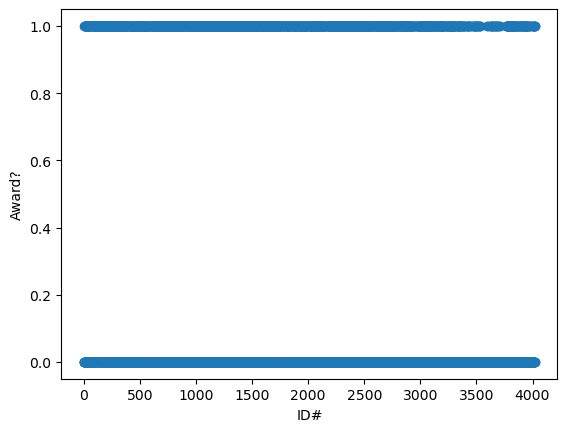

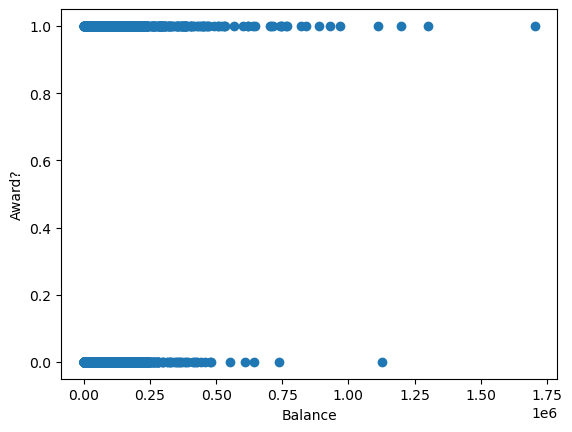

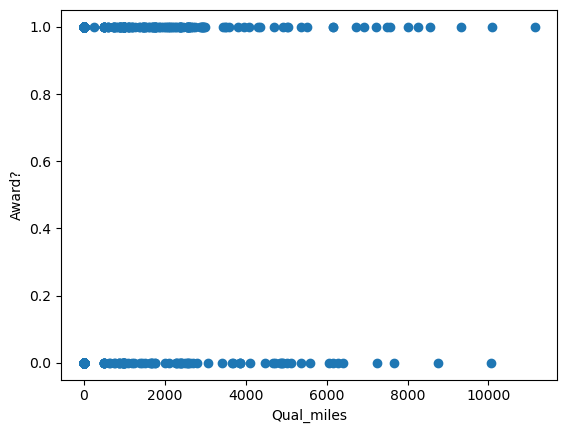

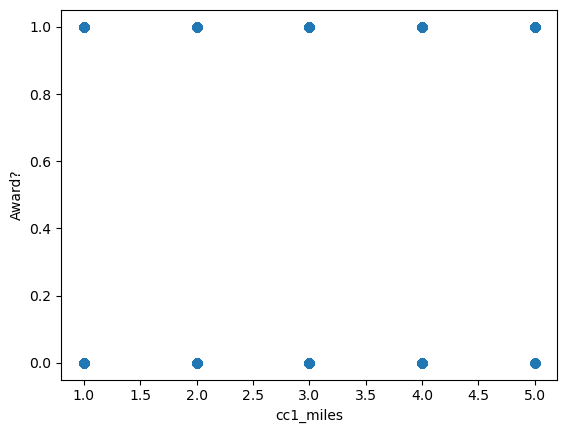

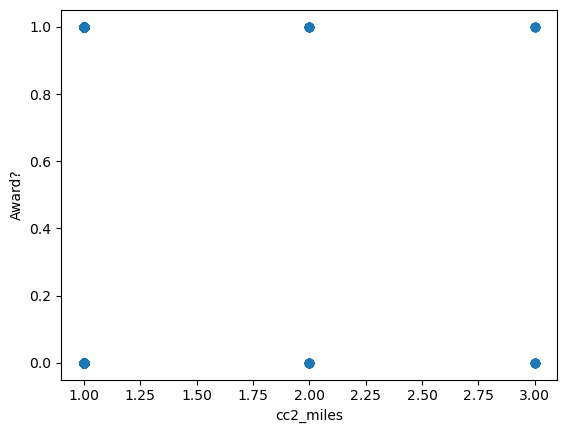

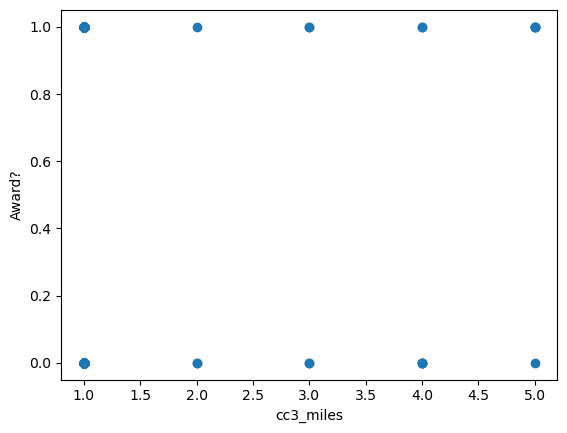

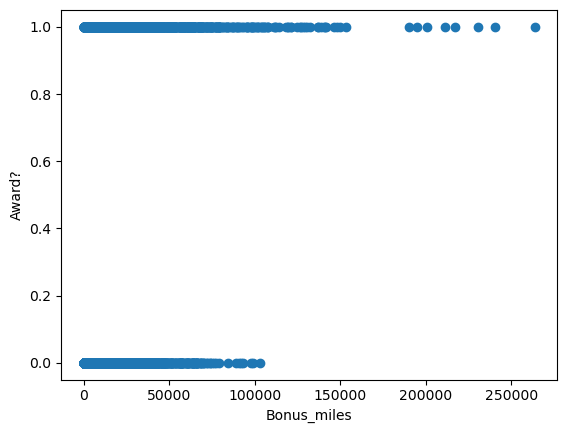

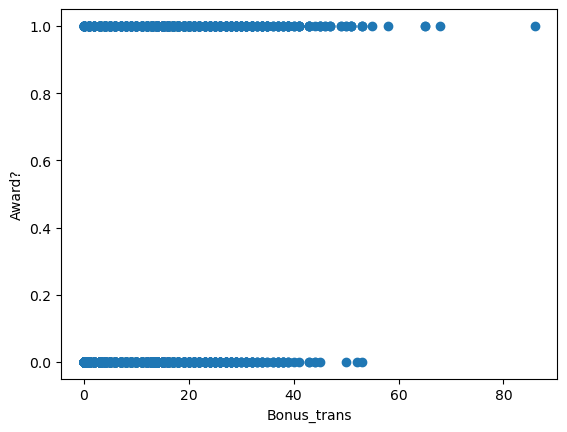

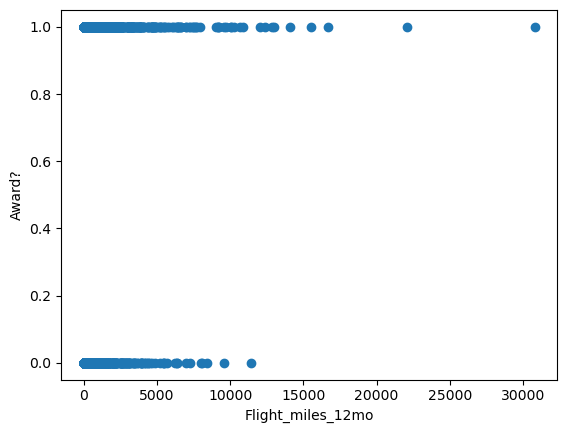

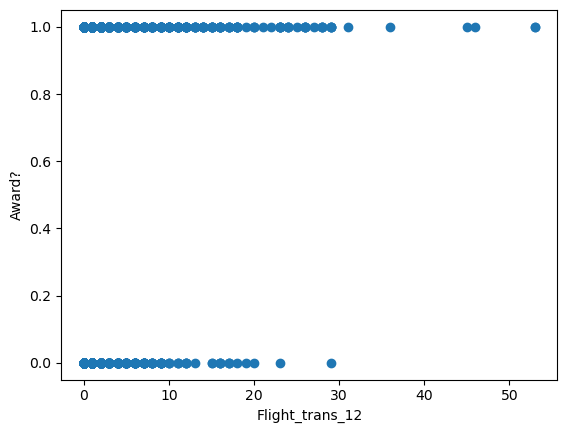

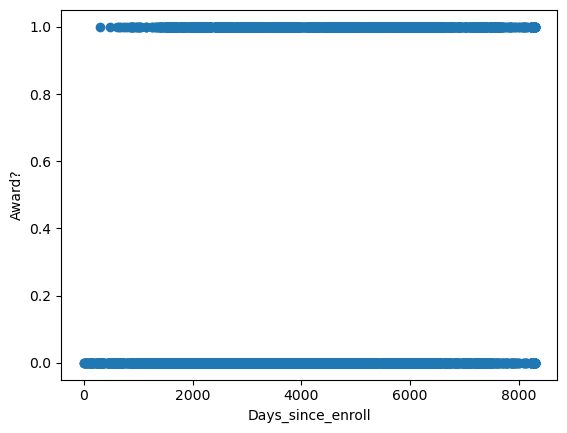

In [10]:
import matplotlib.pyplot as plt

for col in x.columns:
    plt.scatter(data[col],y)
    plt.xlabel(col)
    plt.ylabel('Award?')
    plt.show()

In [11]:
#    3.	Use multiple visualizations to understand the hidden patterns in the dataset

array([[<Axes: title={'center': 'ID#'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Qual_miles'}>],
       [<Axes: title={'center': 'cc1_miles'}>,
        <Axes: title={'center': 'cc2_miles'}>,
        <Axes: title={'center': 'cc3_miles'}>],
       [<Axes: title={'center': 'Bonus_miles'}>,
        <Axes: title={'center': 'Bonus_trans'}>,
        <Axes: title={'center': 'Flight_miles_12mo'}>],
       [<Axes: title={'center': 'Flight_trans_12'}>,
        <Axes: title={'center': 'Days_since_enroll'}>,
        <Axes: title={'center': 'Award?'}>]], dtype=object)

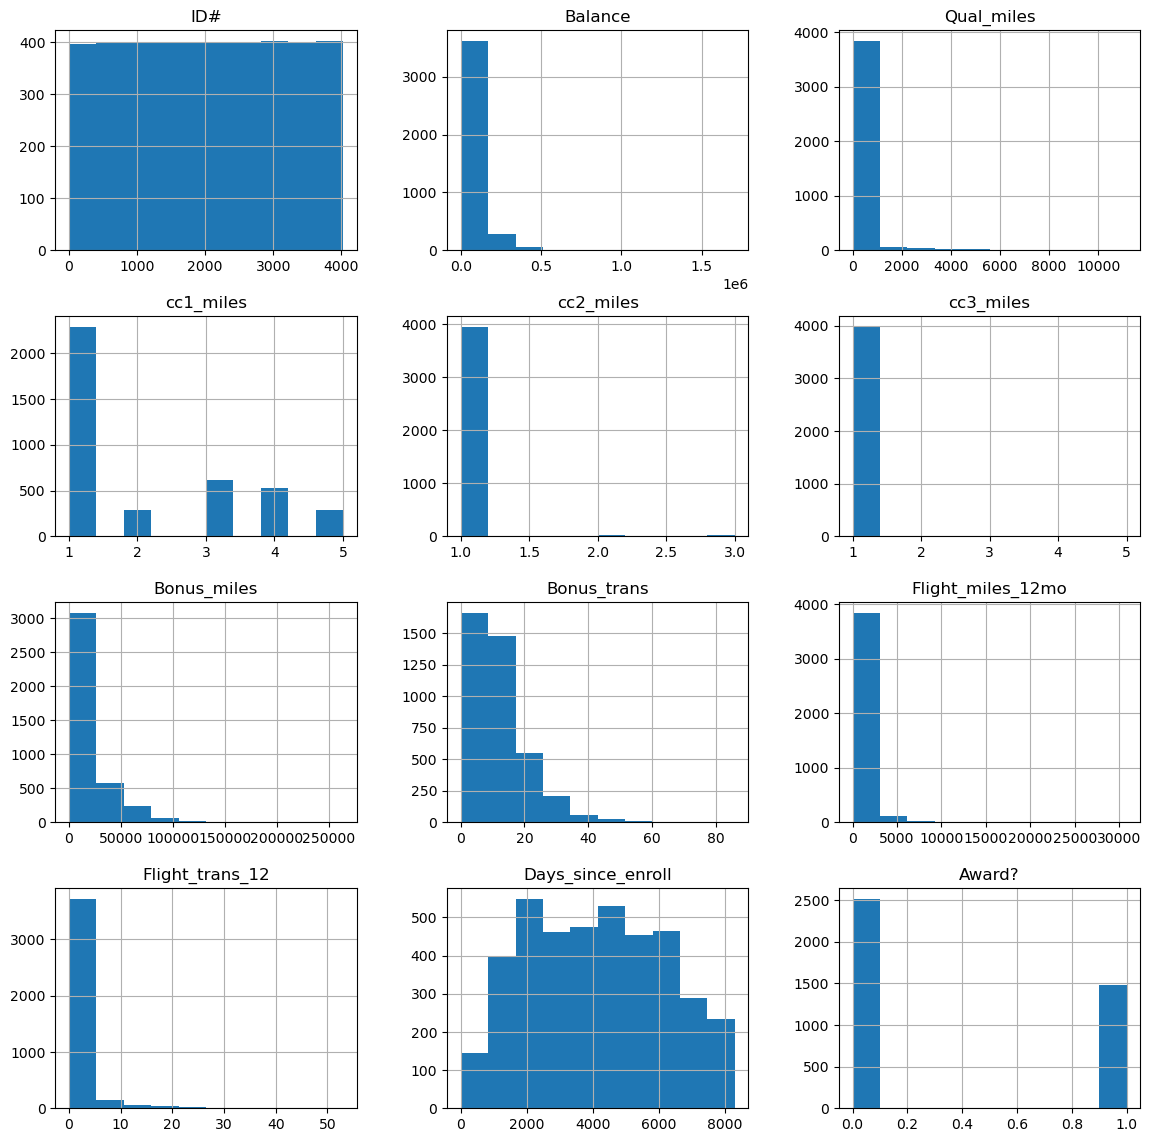

In [12]:
data.hist(figsize = (14,14))

In [13]:
#                                                    Implementing Clustering Algorithms:

In [14]:
# Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.

In [15]:
from sklearn.cluster import KMeans , DBSCAN
from sklearn.metrics import silhouette_score

In [16]:
#	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

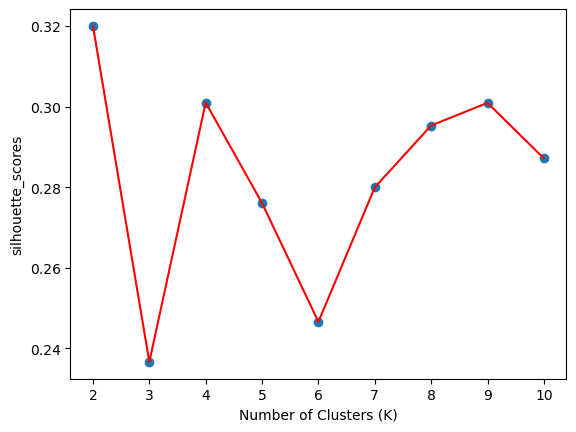

In [17]:
scores = []
for i in range(2,11):
    model = KMeans(n_clusters=i)
    scores.append(silhouette_score(ss_x,model.fit_predict(ss_x)))
    
  
import matplotlib.pyplot as plt
plt.scatter(x=range(2,11),y=scores)
plt.plot(range(2,11),scores,color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('silhouette_scores')
plt.show()

In [25]:
n_clusters = 4

kmeans = KMeans(n_clusters=4, random_state = 42 )
k_labels = kmeans.fit_predict(ss_x)

print("K-Means Silhouette Score: " , silhouette_score(ss_x , k_labels))

K-Means Silhouette Score:  0.26892078477038883


In [27]:
# Add K-Means labels to dataset
data['KMeans_Cluster'] = k_labels

data.groupby('KMeans_Cluster').mean()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
KMeans_Cluster,,,,,,,,,,,,
0,1087.305097,56966.523988,114.719640,1.392804,1.017991,1.000750,6226.828336,8.138681,243.441529,0.736132,5731.161169,0.302099
1,3123.873177,40095.308814,106.242232,1.415980,1.016487,1.000000,6587.386810,8.071655,207.930881,0.621433,2171.796449,0.244769
2,1759.374233,189647.815951,772.625767,2.361963,1.036810,1.257669,38935.134969,28.380368,5204.184049,15.331288,4628.638037,0.791411
3,1506.672432,134265.372973,140.320000,4.064865,1.002162,1.006486,47049.637838,19.658378,366.295135,1.115676,5022.009730,0.608649


In [32]:
dbscan = DBSCAN(eps = 1.2 , min_samples = 5)
d_labels = dbscan.fit_predict(ss_x)

# DBSCAN Clustering
pd.Series(d_labels).value_counts()


 0    3532
-1     420
 1      20
 4      17
 3       5
 2       5
Name: count, dtype: int64

In [33]:
if len(set(d_labels)) > 1 and -1 not in set(d_labels):
    print("DBSCAN Silhouette Score: " , silhouette_score(ss_x , d_labels))
else :
    print("DBSCAN formed noise or single cluster")

DBSCAN formed noise or single cluster


In [20]:
#  Experiment with different parameter settings for K-means (Elbow curve for different K values) 
#  and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

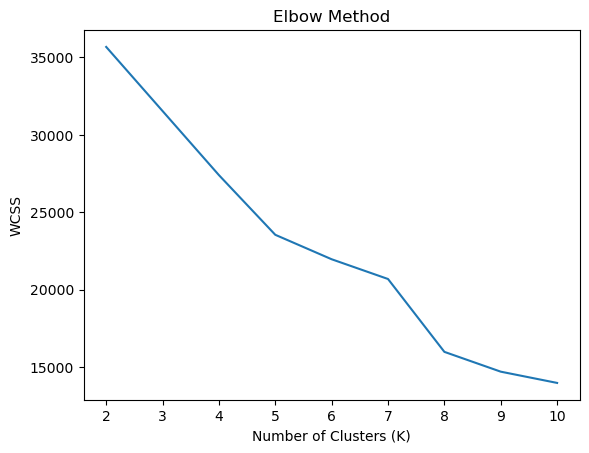

In [34]:
wcss = []
for k in range(2 , 11):
    km = KMeans(n_clusters=k, random_state = 42 )
    km.fit_predict(ss_x)
    wcss.append(km.inertia_)

plt.plot(range(2 , 11) , wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [22]:
for eps in [0.5, 0.8, 1.0, 1.2, 1.5]:
    dbscan = DBSCAN(eps = eps , min_samples = 5)
    labels = dbscan.fit_predict(ss_x)

if len(set(labels)) > 1 and -1 not in set(labels):
    score = silhouette_score(ss_x , labels)
    print(f"eps = {eps} -> DBSCAN Silhouette Score:{round(score,3)} " , )
else :
    print(f"eps = {eps} ->DBSCAN formed noise or single cluster")

eps = 1.5 ->DBSCAN formed noise or single cluster


In [23]:
#                                                     Cluster Analysis and Interpretation:

In [24]:
''The clusters generated by each algorithm were analyzed based on their characteristics
and data distribution.
    
K-Means formed well-separated, compact clusters, while DBSCAN identified dense clusters 
and isolated noise points, providing insight into outliers and irregular patterns in the data.''

SyntaxError: invalid syntax (3605176482.py, line 1)

In [ ]:
#                                                                  Visualization:

=================K-Means Visualization===================


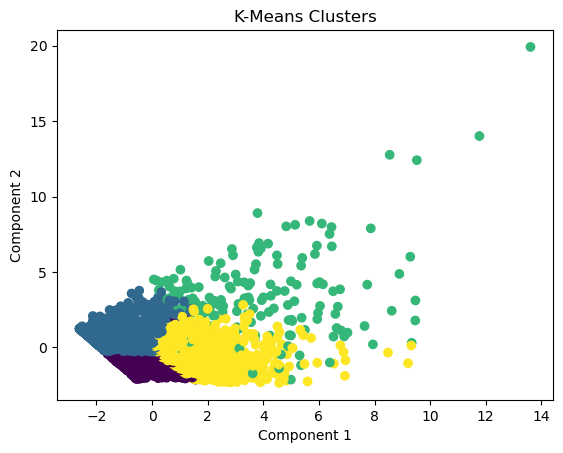

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_2d = pca.fit_transform(ss_x)

print("=================K-Means Visualization===================")
plt.figure()
plt.scatter(x_2d[:,0],x_2d[:,1],c=k_labels)
plt.title("K-Means Clusters")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

=================DBSCAN Visualization===================


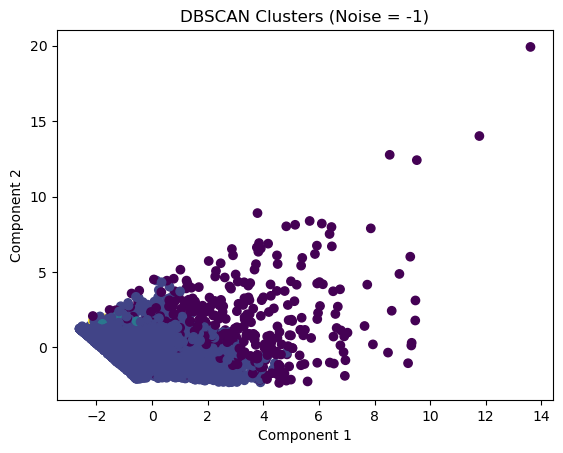

In [36]:
print("=================DBSCAN Visualization===================")
plt.figure()
plt.scatter(x_2d[:,0],x_2d[:,1],c=d_labels)
plt.title("DBSCAN Clusters (Noise = -1)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [ ]:
#                                                        Evaluation and Performance Metrics:

In [ ]:
'''   
eps = 1.5 ->DBSCAN formed noise or single cluster

K-Means Silhouette Score:   0.2366409329087475      
print("DBSCAN silhoutte score",silhouette_score(ss_x , labels))  0.2788160382597214 '''

In [ ]:
Silhoutte score was computed for DBSCAN only when valid clusters were formed; 
otherwise, DBSCAN resulted in a single cluster or noise, making the metric inapplicable.